# **Load Libraries**

In [34]:
#used to reload block diagrams
import numpy as np                    #for multi-dimentional containters
import pandas as pd                   #for dataframes
import plotly.graph_objects as go     #for data visualization
import random
import copy
import matplotlib.pyplot as plt

# **How does Genetic Algorithm Work?**

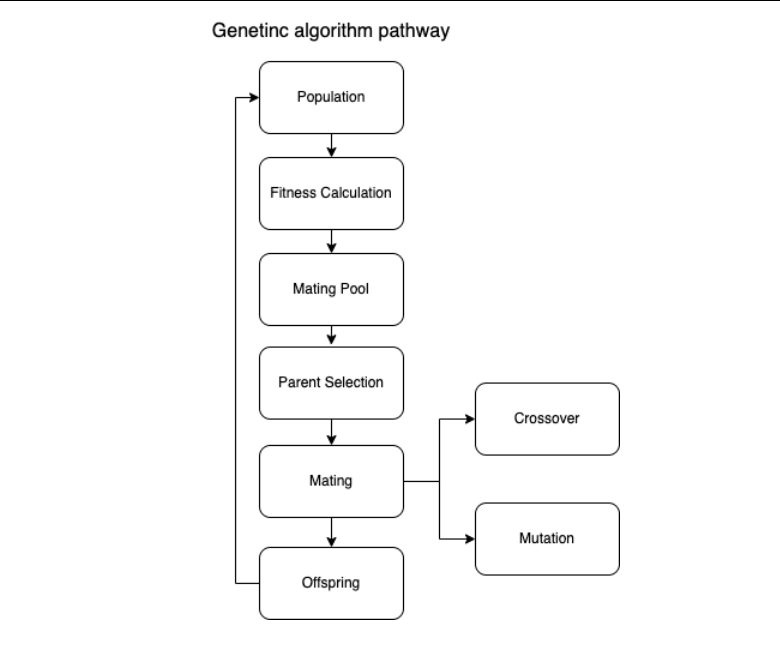

In [20]:
# Number of individuals in each generation
POPULATION_SIZE = 100

# Valid genes
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

# Target string to be generated
TARGET = "SPHERE!"

class Individual(object):
	'''
	Class representing individual in population
	'''
	def __init__(self, chromosome):
		self.chromosome = chromosome
		self.fitness = self.cal_fitness()

	@classmethod
	def mutated_genes(self):
		'''
		create random genes for mutation
		'''
		global GENES
		gene = random.choice(GENES)
		return gene

	@classmethod
	def create_gnome(self):
		'''
		create chromosome or string of genes
		'''
		global TARGET
		gnome_len = len(TARGET)
		return [self.mutated_genes() for _ in range(gnome_len)]

	def mate(self, par2):
		'''
		Perform mating and produce new offspring
		'''

		# chromosome for offspring
		child_chromosome = []
		for gp1, gp2 in zip(self.chromosome, par2.chromosome):

			# random probability
			prob = random.random()

			# if prob is less than 0.45, insert gene
			# from parent 1
			if prob < 0.45:
				child_chromosome.append(gp1)

			# if prob is between 0.45 and 0.90, insert
			# gene from parent 2
			elif prob < 0.90:
				child_chromosome.append(gp2)

			# otherwise insert random gene(mutate),
			# for maintaining diversity
			else:
				child_chromosome.append(self.mutated_genes())

		# create new Individual(offspring) using
		# generated chromosome for offspring
		return Individual(child_chromosome)

	def cal_fitness(self):
		'''
		Calculate fitness score, it is the number of
		characters in string which differ from target
		string.
		'''
		global TARGET
		fitness = 0
		for gs, gt in zip(self.chromosome, TARGET):
			if gs != gt: fitness+= 1
		return fitness

# Driver code
def main():
	global POPULATION_SIZE

	#current generation
	generation = 1

	found = False
	population = []

	# create initial population
	for _ in range(POPULATION_SIZE):
				gnome = Individual.create_gnome()
				population.append(Individual(gnome))

	while not found:

		# sort the population in increasing order of fitness score
		population = sorted(population, key = lambda x:x.fitness)

		# if the individual having lowest fitness score ie.
		# 0 then we know that we have reached to the target
		# and break the loop
		if population[0].fitness <= 0:
			found = True
			break

		# Otherwise generate new offsprings for new generation
		new_generation = []

		# Perform Elitism, that mean 10% of fittest population
		# goes to the next generation
		s = int((10*POPULATION_SIZE)/100)
		new_generation.extend(population[:s])

		# From 50% of fittest population, Individuals
		# will mate to produce offspring
		s = int((90*POPULATION_SIZE)/100)
		for _ in range(s):
			parent1 = random.choice(population[:50])
			parent2 = random.choice(population[:50])
			child = parent1.mate(parent2)
			new_generation.append(child)

		population = new_generation

		print("Generation: {}\tString: {}\tFitness: {}".\
			format(generation,
			"".join(population[0].chromosome),
			population[0].fitness))

		generation += 1


	print("Generation: {}\tString: {}\tFitness: {}".\
		format(generation,
		"".join(population[0].chromosome),
		population[0].fitness))

if __name__ == '__main__':
	main()

Generation: 1	String: FwI;NEA	Fitness: 6
Generation: 2	String: FwI;NEA	Fitness: 6
Generation: 3	String: FPWsmEa	Fitness: 5
Generation: 4	String: FPWsmEa	Fitness: 5
Generation: 5	String: FPWsmEa	Fitness: 5
Generation: 6	String:  PH#RT"	Fitness: 4
Generation: 7	String:  PH#RT"	Fitness: 4
Generation: 8	String: &PH;REF	Fitness: 3
Generation: 9	String: &PH;REF	Fitness: 3
Generation: 10	String: &PH;REF	Fitness: 3
Generation: 11	String: &PH;REF	Fitness: 3
Generation: 12	String: 0PHsRE!	Fitness: 2
Generation: 13	String: 0PHsRE!	Fitness: 2
Generation: 14	String: 0PHsRE!	Fitness: 2
Generation: 15	String: 0PHsRE!	Fitness: 2
Generation: 16	String: 0PHsRE!	Fitness: 2
Generation: 17	String: SPH7RE!	Fitness: 1
Generation: 18	String: SPH7RE!	Fitness: 1
Generation: 19	String: SPH7RE!	Fitness: 1
Generation: 20	String: SPH7RE!	Fitness: 1
Generation: 21	String: SPH7RE!	Fitness: 1
Generation: 22	String: SPH7RE!	Fitness: 1
Generation: 23	String: SPH7RE!	Fitness: 1
Generation: 24	String: SPH7RE!	Fitness: 1
G


# **Let's optimize to sphere function.**

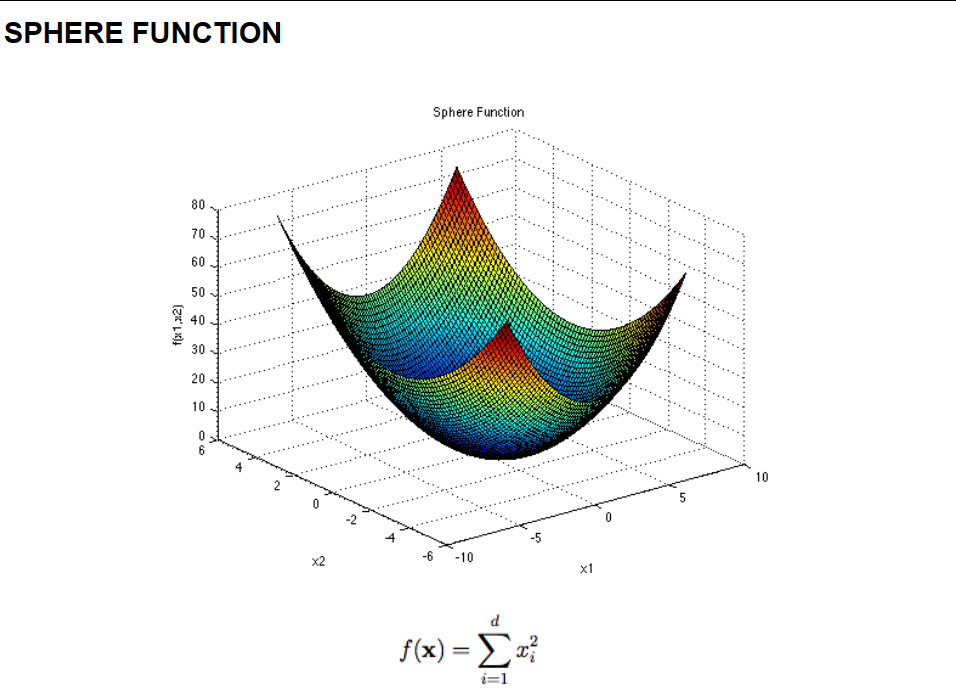

# **Input Domain:**

# The function is usually evaluated on the hypercube xi ∈ [-5.12, 5.12], for all i = 1, …, d.

# **Global Minimum:**


spheref3.png

#**Implement Genetic Algorithm**

##Define the sphere function

In [21]:
# cost function
def sphere(x):
    return sum(x**2)

# Placeholder for every individual
population = {}

# population size
npop = 20
# lower bound
varmin = -5.12
# upper bound
varmax = 5.12
# cost function
costfunc = sphere

#**1) Representation: Real-Valued Encoding**

In [22]:
# each inidivdual has position(chromosomes) and cost(Fitness)
for i in range(npop):
    population[i] = {'position': None, 'cost': None}
    # Best solution found
    # create individual as many as population size(npop)
bestsol = copy.deepcopy(population)
bestsol_cost = np.inf
for i in range(npop):
    population[i] = {'position': None, 'cost': None}
for i in range(npop):
    population[i]['position'] = np.random.uniform(varmin, varmax,npop)
    population[i]['cost'] = costfunc(population[i]['position'])

#**Roulette wheel selection:**

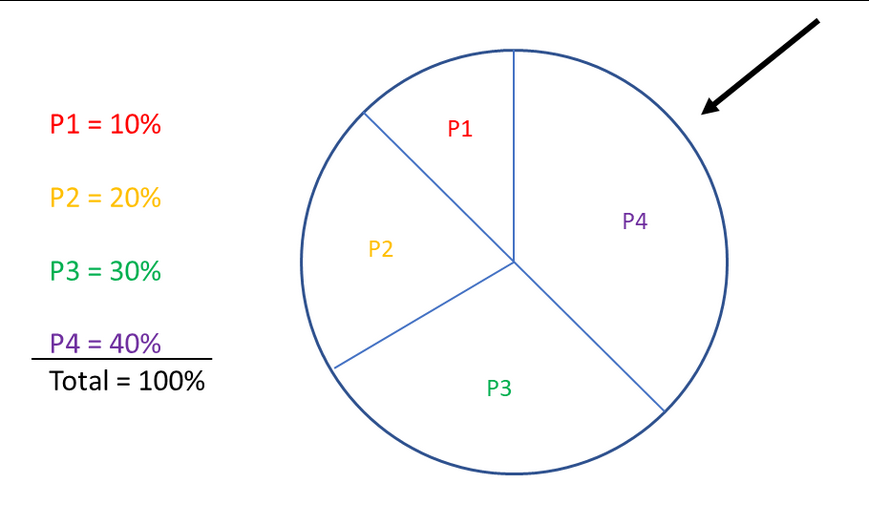

In [23]:
# Calculating probability for roulette wheel selection
beta = 1
# Create for list
costs = []

for i in range(len(population)):
   # list of all the population cost
   costs.append(population[i]['cost'])
costs = np.array(costs)
# take mean of all
avg_cost = np.mean(costs)
if avg_cost != 0:

    """We calculate each parent’s probability by the exponential of negative beta times costs,
    where beta is a pre-defined integer and costs is the cost of each parent divided
    by the average cost of all the parents in the population."""

    costs = costs/avg_cost
probs = np.exp(-beta*costs)

def roulette_wheel_selection(p):
    # cumulative sum creating linear roulette wheel
    c = np.cumsum(p)
    # sum(p) = calculate to 100%
    # create random number
    r = sum(p) * np.random.rand()
    # sometimes r becomes bigger than c, drop them
    # choose non_zero population
    ind = np.argwhere(r <= c)
    # get the index of the first parent whose cumulative value is greater than the random number.
    return ind[0][0]

# roulette_wheel_selection(probs) choose randomly indices from population.
# lets create parents:

p1 = population[roulette_wheel_selection(probs)]
print(p1)
p2 = population[roulette_wheel_selection(probs)]
print(p2)

{'position': array([ 1.83629969, -0.28274044,  3.38083442, -3.03150503,  0.74229663,
       -4.32123361, -0.68746809,  0.32157425,  3.51181038,  3.91395757,
       -4.72977428, -4.92980753, -4.53406951,  0.53996095, -1.20161013,
       -1.89193915, -0.7549228 ,  0.25401849, -2.79251844,  3.5330675 ]), 'cost': 164.98553631045158}
{'position': array([ 2.46171722, -3.23164513, -0.4206257 , -1.99433869, -1.08022068,
        1.54635822,  1.74021938, -3.39838015, -4.703972  ,  3.79957183,
        1.50982772, -3.71342102, -3.7819846 , -3.37724611,  3.75911911,
        2.0070661 , -3.14013282, -1.8676664 ,  1.15378199,  1.82921064]), 'cost': 153.32084656611005}


#**Uniform Crossover**

In [24]:
def crossover(p1, p2):
    # take a copy of parents
    c1 = copy.deepcopy(p1)
    c2 = copy.deepcopy(p2)
    alpha = np.random.uniform(0, 1, *(c1['position'].shape))
    c1['position'] = alpha*p1['position'] + (1-alpha)*p2['position']
    c2['position'] = alpha*p2['position'] + (1-alpha)*p1['position']
    return c1, c2

# **Gaussian mutation**

In [25]:
def mutate(c, mu, sigma):
   # mu - mutation rate. % of gene to be modified
   # sigma - step size of mutation
   # mutation = original gene + (step size * random number)
    y = copy.deepcopy(c)
   # array of True and Flase, indicating the mutation position
    flag = np.random.rand(*(c['position'].shape)) <= mu
    ind = np.argwhere(flag)
    y['position'][ind] += sigma * np.random.randn(*ind.shape)
    return y

# **Evaluating the Offsprings**

In [26]:
# Evaluate first off spring
# calculate cost function of child 1
# Best solution found
bestsol = copy.deepcopy(population)
# initial best cost is infinity
bestsol_cost = np.inf
c1,c2 = crossover(p1, p2)
c1['cost'] = costfunc(c1['position'])
if type(bestsol_cost) == float:
  # replacing best solution in every generation/iteration
  if c1['cost'] < bestsol_cost:
    bestsol_cost = copy.deepcopy(c1)
else:
   # replacing best solution in every generation/iteration
   if c1['cost'] < bestsol_cost['cost']:
        bestsol_cost = copy.deepcopy(c1)
# Evaluate second off spring
if c2['cost'] < bestsol_cost['cost']:
    bestsol_cost = copy.deepcopy(c2)

print("c1 cost",c1['cost'])
print("c2 cost",c2['cost'])

c1 cost 124.8038239766131
c2 cost 153.32084656611005


In [27]:
# This function holding in borders

def bounds(c, varmin, varmax):
    #Defines the upper and lower bound of gene value
    c['position'] = np.maximum(c['position'], varmin)
    c['position'] = np.minimum(c['position'], varmax)
    return c['position']

c1['position'] = bounds(c1, varmin, varmax)
c2['position'] = bounds(c2, varmin, varmax)

c1['cost'] = costfunc(c1['position'])
c2['cost'] = costfunc(c2['position'])
print("c1 cost",c1['cost'])
print("c2 cost",c2['cost'])

c1 cost 124.8038239766131
c2 cost 109.53776222657534


#**Loop chooses the best one and updating with it.**

In [28]:
# This loop choose the best one and updating with this.
if type(bestsol_cost) == float:
    # replacing best solution in every generation/iteration,
    if c1['cost'] < bestsol_cost:
        bestsol_cost = copy.deepcopy(c1)
    else:
        if c1['cost'] < bestsol_cost['cost']:
            bestsol_cost = copy.deepcopy(c1)

        elif c2['cost'] < bestsol_cost['cost']:
            bestsol_cost = copy.deepcopy(c2)

bestsol_cost

{'position': array([ 2.11429063, -1.28878659,  1.95906485, -2.73620894, -1.06318562,
        -2.39624891, -0.63409103, -2.54145269, -3.99608658,  3.88769899,
        -1.83397568, -3.85047589, -4.37481916, -0.10004695,  3.72755778,
        -0.96036818, -1.91636117, -0.65832005, -1.63305991,  1.89819099]),
 'cost': 124.8038239766131}

#**Merge Offsprings with the Main Population and Sort**

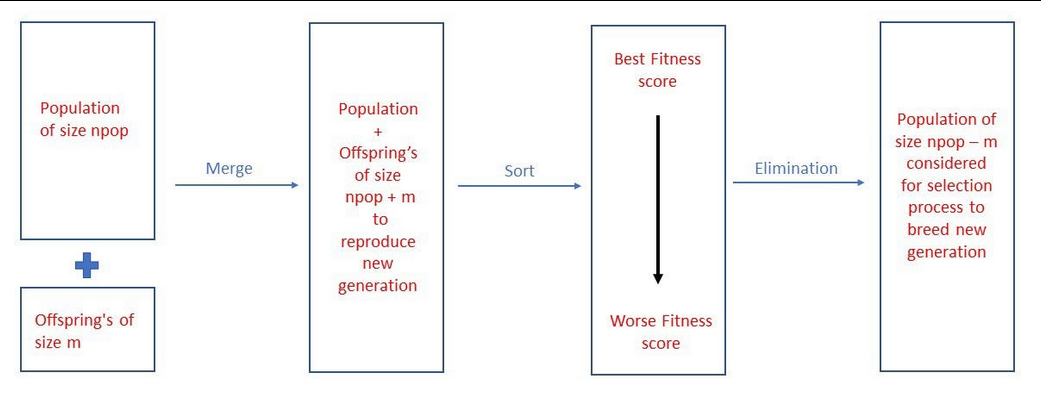

In [29]:
# All function for GA

# cost function
def sphere(x):
    return sum(x**2)
def roulette_wheel_selection(p):
    c = np.cumsum(p)
    r = sum(p) * np.random.rand()
    ind = np.argwhere(r <= c)
    return ind[0][0]
def crossover(p1, p2):
    c1 = copy.deepcopy(p1)
    c2 = copy.deepcopy(p2)
    # Uniform crossover
    alpha = np.random.uniform(0, 1, *(c1['position'].shape))
    c1['position'] = alpha*p1['position'] + (1-alpha)*p2['position']
    c2['position'] = alpha*p2['position'] + (1-alpha)*p1['position']
    return c1, c2
def mutate(c, mu, sigma):
    #c: child chromosome
    #mu: mutation rate. % of gene to be modified
    #sigma: step size of mutation'''
    y = copy.deepcopy(c)
    flag = np.random.rand(*(c['position'].shape)) <= mu  # array of True and Flase, indicating at which position to perform mutation
    ind = np.argwhere(flag)
    y['position'][ind] += sigma * np.random.randn(*ind.shape)
    return y
def bounds(c, varmin, varmax):
    #Defines the upper and lower bound of gene value'''
    c['position'] = np.maximum(c['position'], varmin)
    c['position'] = np.minimum(c['position'], varmax)
    return c['position']
def sort(arr):
    # Bubble sorting the population + offsoring
    # in every iteration to get best fit individuals at top'''
    n = len(arr)

    for i in range(n-1):
        for j in range(0, n-i-1):
            if arr[j]['cost'] > arr[j+1]['cost']:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

#**Let's creating all function in one function**

In [30]:
def ga(costfunc, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, beta, verbose):

  # Placeholder for each individual
    population = {}
    # each inidivdual has position(chromosomes) and cost,
    for i in range(npop):
        population[i] = {'position': None, 'cost': None}
        # create individual as many as population size(npop)

    # Best solution found
    bestsol = copy.deepcopy(population)
    # initial best cost is infinity
    bestsol_cost = np.inf

  # Initialize population - 1st Gen
    for i in range(npop):
        population[i]['position'] = np.random.uniform(varmin, varmax, num_var)
        # randomly initialize the chromosomes and cost
        population[i]['cost'] = costfunc(population[i]['position'])
        # if cost of an individual is less(best) than best cost,

        if population[i]['cost'] < bestsol_cost:
        # replace the best solution with that individual
            bestsol = copy.deepcopy(population[i])

    # Best cost of each generation/iteration
    bestcost = np.empty(maxit)

    print("Results return per {} iter".format(verbose))
    # Main loop
    for it in range(maxit):
    # Calculating probability for roulette wheel selection
        costs = []
        for i in range(len(population)):
            costs.append(population[i]['cost'])
            # list of all the population cost
        costs = np.array(costs)
        avg_cost = np.mean(costs)
        # taking average of the costs
        if avg_cost != 0:
            costs = costs/avg_cost
        # probability is exponensial of -ve beta times costs
        probs = np.exp(-beta*costs)

        for _ in range(num_children//2):

            # we will be having two off springs for each crossover
            # hence divide number of children by 2

            # Roulette wheel selection
            p1 = population[roulette_wheel_selection(probs)]
            p2 = population[roulette_wheel_selection(probs)]

            # crossover two parents
            c1, c2 = crossover(p1, p2)

            # Perform mutation
            c1 = mutate(c1, mu, sigma)
            c2 = mutate(c2, mu, sigma)

            # Apply bounds
            c1['position'] = bounds(c1, varmin, varmax)
            c2['position'] = bounds(c2, varmin, varmax)

            # Evaluate first off spring
            # calculate cost function of child 1
            c1['cost'] = costfunc(c1['position'])

            if type(bestsol_cost) == float:
                # replacing best solution in every generation/iteration
                if c1['cost'] < bestsol_cost:
                    bestsol_cost = copy.deepcopy(c1)
            else:
                # replacing best solution in every generation/iteration
                if c1['cost'] < bestsol_cost['cost']:
                    bestsol_cost = copy.deepcopy(c1)


            # Evaluate second off spring
            # replacing best solution in every generation/iteration

            if c2['cost'] < bestsol_cost['cost']:
                bestsol_cost = copy.deepcopy(c2)
        # Merge, Sort and Select
        population[len(population)] = c1
        population[len(population)] = c2
        # Sort
        population = sort(population)
        # Store best cost
        bestcost[it] = bestsol_cost['cost']

        # Show generation information

        if it % verbose == 0:
            print('Iteration {}: Best Cost = {}'. format(it, bestcost[it]))



    out = population
    Bestsol = bestsol
    bestcost = bestcost
    return (out, Bestsol, bestcost)

#**Visualize the results**

Results return per 100 iter
Iteration 0: Best Cost = 2.982342240195987
Iteration 100: Best Cost = 0.07408094602256167
Iteration 200: Best Cost = 0.07227695976139409
Iteration 300: Best Cost = 0.03691472249577535
Iteration 400: Best Cost = 0.02957423873940231


<function matplotlib.pyplot.show(close=None, block=None)>

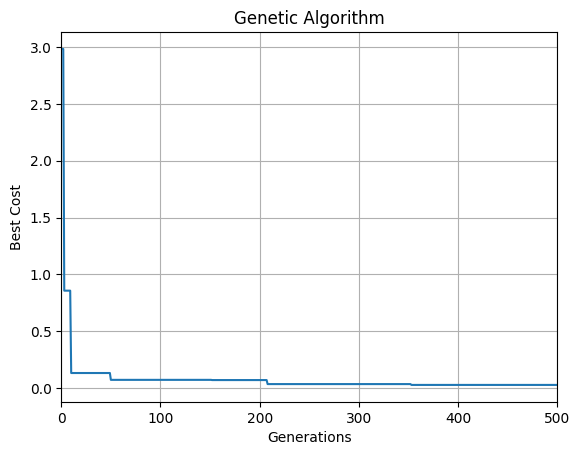

In [46]:
# Problem definition
costfunc = sphere
# number of decicion variables
num_var = 5
# lower bound
varmin = -5.12
# upper bound
varmax = 5.12

# GA Parameters
# number of iterations
maxit = 500
# initial population size
npop = 20
beta = 1 # index for somewhere
# proportion of children to population
prop_children = 4
# making sure it always an even number
num_children = int(np.round(prop_children * npop/2)*2)
# mutation rate 40%
mu = 0.5
# step size of mutation
sigma = 0.2
# verbose for print frequency
verbose = 100

# Run GA
out = ga(costfunc, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, beta, verbose)

# Results
#(out, Bestsol, bestcost)
plt.plot(out[2])
plt.xlim(0, maxit)
plt.xlabel('Generations')
plt.ylabel('Best Cost')
plt.title('Genetic Algorithm')
plt.grid(True)
plt.show